YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - loss: 0.1204 - val_loss: 0.0010
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 0.0016 - val_loss: 0.0041
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 7.2273e-04 - val_loss: 0.0011
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 4.2463e-04 - val_loss: 3.5010e-04
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 3.9254e-04 - val_loss: 3.1410e-04
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 3.9625e-04 - val_loss: 3.0626e-04
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 3.4703e-04 - val_loss: 2.8710e-04
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 3.5197e-04 - val_loss: 2.9944e-04
Epoch 12/50
24/

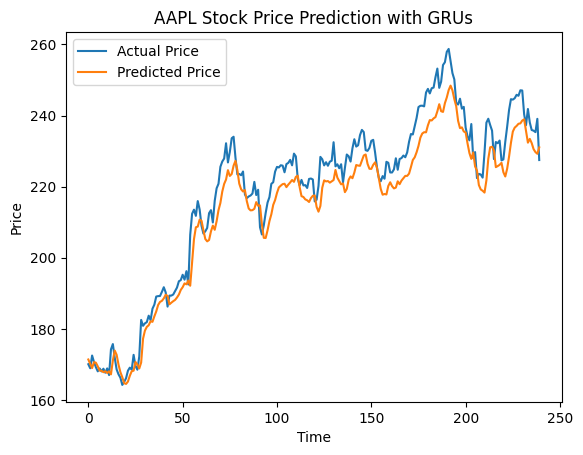

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━

In [20]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import matplotlib.pyplot as plt

stock_data = yf.download('AAPL', start='2020-03-11', end='2025-03-11')
data = stock_data['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(GRU(50, return_sequences=False))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.plot(y_test_inv, label='Actual Price')
plt.plot(predicted, label='Predicted Price')
plt.title('AAPL Stock Price Prediction with GRUs')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

last_60_days = scaled_data[-seq_length:]
future_predictions = []
for _ in range(30):
    pred = model.predict(last_60_days.reshape(1, seq_length, 1))
    future_predictions.append(pred[0, 0])
    last_60_days = np.append(last_60_days[1:], pred, axis=0)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
print("Predicted prices for next 30 days:", future_predictions)